# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

### NOTE: need to run it in Unity environment each time

In [1]:
import datetime
tstart_run = datetime.datetime.now()


In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.29 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

## 4.1 Description of provided files
I originally tried to base my model after the Udacity MADDPG (Multi-Agent Deep Deterministic Policy Gradient) lessons in the multi-agent actor-critic section for agent collaboration-competition, specifically the maddpg miniproject; however, I had issues with getting this to run with more than 3 non-zero rallies, so after looking on the web a several approaches:

https://github.com/Nathan1123/P3_Collaboration_and_Competition
https://github.com/ainvyu/p3-collab-compet

I decided to abandon the MADDPG framework (which was mainly for a custom environment setup anyways), and work with a list of 2 of the DDPGAgents from the P2 / bipedal examples (I found the P2 DDPG Agent to be most useful). 

I started with those original ddpg_model.py and ddpg_agent.py files I had previously for the second project (P2) and modified them slightly, adding a few additional hyperparameters suggested by solutions I examined on the web and a corporate mentor.

I did however take from the MADDPG miniproject the main.py 2 initial functions (seeing and preprocess) and placed them in the utilities.py file and taking the episode code of the main function out of the function and just provided inline below. However, we only use seeding (initialize the random number generators for numpy and torch)

The main execution, plotting etc is all done in the Tennis.ipynb file.

The rest of the files are support files from both MADDPG (workspace_utils.py functionality from the MADDPG mini-project in the hopes of avoiding any timeout issues with long runs, and the utilities.py file, adding the two functions at the beginning of main.py of that project to the utilities as well and two helper classes, replaybuffer and OUNoise, pulled out of the original P2 ddpg_agent.py, in part because the implementation of the MADDPG class (which we started with) had the replay buffer usage outside as a separate function, 

The Tennis.ipynb contains for the most part the original provided file, but with the original random actions code was removed and my code added in. There are several setup sections of code ahead of the main episode loop, but we didn't put it into a function (yet) to allow free flow of information in and out of the episode loop. The end contains the plots etc. We had planned to also test our results by reading in the saved models (commented out code) but ran out of time. It is removed in this report.

# My model description, used final values
ddpg_model.py has two classes, an actor and a critic class, which are separately definable in terms of both the number of layers, noise additions, batchnormalization and/or dropout layers, and their sizes. However, for the vast majority of our efforts these two classes were essentially the same (hidden layer sizes and functionality).

The NN in both the Actor and Critic is composed of 3 fully connected layers with two NN hidden layer sizes (defaults: fc1_size=***40*** and fc2_size=***20***) using RELU activation functions along with an initial state_size and a final action_size to map into the Tennis input (state) and output (action) environment via a tanh function for the actor, and the output of the final layer with 1 element for the critic. 

The DDPG has an __init__ function to be invoked on class creation and the forward method using the NN's to convert the current state into an action.

Here we used the same structure we had for the DDPG for the pendulum problem, but based on the corporate mentor comments who had done it previously, we reduced the size of the layers to 20 and 40, respectively. However we fully explored a wide variety of layer size values from 400,300 to 20,20.

Based on suggestions from the corporate mentor as well, we tried adding noise to the weights in the network, and then for good measure also tried it in the states as well as to the action. We also tried batch normalization, dropouts, etc but none of these seemed effective in training at the time that I looked at it (small BUFFERSIZE=16).

The hyperparmeters passed in during intialization for the Actor and Critic networks are
state_size -- the size of the state outputs (24)
action_size - the size of the actions (2)
seed -- a specified random seed, required 123456765
fc1_units -- the size of the first hidden layer, default was a specified value in the model potentially independently for the actor and critic (40) 
fc2_units-- the size of the first hidden layer, default was a specified value in the model potentially independently for the actor and critic (20)
momentum -- the value of the momentum for the batchnorm layer (currently unused) (0.1)

Separate methods are provided for the Actor and Critic and include the basics, reset_parameters (used in init) to randomize the fully connected NN weights, and the forward function.

The ddpg_agent.py file contains the DDPG Agent functionality, with both local and target networks for both the Actor and the Critic networks. The local networks do the continuous learning and the target networks are updated with those results slowly via soft_update method based on the size of the parameter tau. It also contains the optimizers for both the actor and the critic networks as well as the noise class and replaybuffer class functionality for this capability in the DDPG funtionality. We borrowed from 

https://github.com/Nathan1123/P3_Collaboration_and_Competition

setting the memory to None and thereby only creating a (single) buffer for all DDPGAgent instances, so that the experiences of all the agents would be shared with each other.

The input hyperparameters for ddpg_agent are:
state_size -- dimension of each state (see above) (24)
action_size -- dimension of each action (see above) (2)
num_instance -- number of instances of agents employed (=1 for this project)
random_seed -- random seed
lr_actor -- learning rate of the actor (2.0e-4 final value)
lr_critic -- learning rate of the critic (2.0e-4, final value)
tau -- soft_update size of updating the target network with the local network values (1.0e-2 final value)
gamma -- discount factor for the learn method for the critic network (0.8 final value)
The ddpg_agent also contains the following hardcoded parameters:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
WEIGHT_DECAY = 0        # L2 weight decay used in critic optimizer
LEARN_START = 0         # minimum memory in replay buffer before executing learn method
UPDATE_EVERY=10         # used to modulo the increasing t_step internal counter to determine if learning from replaybuffer experiences (or not)
UPDATES_PER_STEP=10     # define number of times the model learns from the randomly selected experiences in replaybuffer
NOISE_MU = 0.0          # the mean of the action noise for OUNoise class
NOISE_THETA = 0.15      # the memory term for the Ornstein-Uhlenbeck process
NOISE_SIGMA = 0.1       # the standard deviation of action noise for OUNoise class, 0.1 was better than 0.2

The DDPGAgent has the usual agent functions of 
step
act and 
learn, which in turn uses a soft_update function for updating the target network with local parameters based on the weighting tau

The Agent class itself is composed of an __init__ fuction for construction, which creates the two actor-critic networks, one that is local and one that is the target network, along with the optimizer and memory buffer classes (separate file (package)) from the ReplayBuffer class to store experiences and a noise source (Orstein-Uhlenbeck, from the original DDPG mini-project) class as well. 

The Agent step method adds the current experience into the memory buffer for each agent, and stores the experience into memory. Step also exectutes the learn function various tests are passed:

1) if the number of experiences exceeds the hyperparameter LEARN_START (here always 0)  
2) for each call to step if the step count modulo the hyperparameter UPDATE_EVERY then the learn function can be called IF the experiences in replaymemory is larger than the BATCH_SIZE (which is the amount of experiences pulled out at a time)  
3) Once the above two criteria are met, then perform UPDATES_PER_STEP number of learn steps for each call to the function step  

The Agent act method returns actions for a given state given current policy. When it is not learning (no_grad()) it retrieves the actions for each actor from the local (actor) network and the current states. It does this by evaluating (eval) the local actor network, get new actions from the local network, train the local network if applicable, and finally select actions with noise.

The Agent learn method was the one for which we had to provide the appropriate solutions previously with the DDPG P2 project, but with two instances in a list and one memory location. Here we unpack the tuple experiences into states, actions, rewards, next_states, and dones. The next_states are used in the target (NOT local) qnetwork to get the next target actions. These are then detached from the resulting tensor to make a true copy, access Qtable for the next action, and hence the rewards of the target network. We then get the next action results from the local network and then determine the MSE loss between the target and local network fits. We then zero_grad the optimizer, propagate the loss backwards through the network, and perform a step in the optimizer. Finally a soft update is performed on the target network, using TAU times the local network parameters and (1-TAU) times the target network parameters to update the target network parameters.

As indicated the original DDPG, the agent has a helper class ReplayBuffer, with methods add, to add experiences to the buffer, and sample, to sample experiences from the buffer, and is used extensively in the step method for the Agent class.

From the P2 project we retained the functionality of having multiple instances of games running, but for this effort we basically set the number of instances to 1. We have not tested if or how well having more instances would work (or not). For another day.

Because I was (potentially) adding noise to the actions, I also needed to clip them before passing them out of act when that was the case (add_noise=True).

Although we allowed for a delay to start learning while the replay buffer was filled, nothing we saw suggested anything else but zero (0) for this option and that is what we used throughout.

The rest of the files are basically support functions; for example from the MADDPG miniproject we borrowed some of the utilties as is (workspace_utils.py, utilities.py), to keep the workspace alive on Udacity and to have some utility functions MADDPG, adding the seeding and preprocess functions from MADDPG main.py to the utility.py file, only using seeding function to start the random seeding of pytorch and numpy, however.

The ReplayBuffer and OUNoise classes as separate .py files to keep things as clean as possible. 

## APPROACH
After many failed attempts with the MADDPG class, I reviewed the below solutions:

https://github.com/Nathan1123/P3_Collaboration_and_Competition
https://github.com/ainvyu/p3-collab-compet

which were quite simple but with large networks. 

From those reviews, I decided to simplify things (but leave the hooks in to show what I tried) and drop the MADDPG class. ALthough my approach is slightly different than either of these approaches, they were very helpful in focusing my next steps, especially just working with the DDPGAgents as a list of separate agents.

I started with the default (intial) values for the previous DDPG except for the hidden layer sizes (used 20,20 (corporate mentor) and 400,300 (example cases), and then made changes to hyperparameters as I tested for sensitivity to those hyperparameters. I also tried later various suggestions from the corporate mentor, Udacity mentors, etc.

The the Tennis.ipynb you will see that I create two separate instances of the ddpg_agents and loop through them in the processing, looking for max of their scores

The biggest breakthrough aspect of our training was increasing the BUFFERSIZE from 16 to 128 (we also tried 64 and 256 buffer sizes  but 128 seemed to work best with our previously best "searched for" values). Although early on (with the MADDPG framework) increasing the buffersize didn't have much of any effect, with our simplier network implementation, all the larger sizes seemed to keep the learning going much longer, albiet in the other two cases the 100 sample moving average was more about 0.1 in about 4000-8000 episodes instead of the 0.5 we required

We originally started with a higher gamma 0.9 and the previous values of the learning rates for the actor (1e-4) and critic (1e-3) but settled on the provided values in our final solution after our extensive earlier searches (but with the smaller buffersize). 

We searched on pretty much everything we could think of, including a number of approaches suggested by both mentors (increasing the hidden layer sizes, which was contrary to the corporate mentor suggestion to keep them small (20 and 20 was big enough)), ranging from 400,300 to 20,20. 

Similarly we examined 6 separate values of lra from 1e-3 to 1e-5 and 7 values of lrc from 2e-3 to 1e-5, although the search wasn't exhaustive. 

Values of gamma were explored from 0.8 to 0.99 and 5 values of tau from 1e-1 to 1e-3

We also examined a number of suggestions from my corporate mentor (use parameter noise not action noise -- didn't seem to work at the time), and I looked briefly at adding state noise and dropout layers as well but eventually removed them as again they didn't seem to work and the prior examples I looked at didn't do that to get solutions, so I abandoned the effort.

Another suggestion from my corporate mentor was to use a batchnorm1d after the first NN. I tried this as well but in the end I didn't see any improvement so I removed them as well, although I left in the hooks and commented code in case I want to generalize this capability in the future.

Once I settled on the larger batch size (but with 20,20 hidden layer sizes), the results were promising but not sufficient so I started looking into increasing the hidden layer size and the 20,40 looked promising enough that I first set the episodes to exit after hitting the 0.5 mark, which it did shortly after 4000 iterations (8000 max) and then added a 10% buffer (0.55 before exit but print when it met the mark) and this took 7910 iterations (2.5 hrs to run!).

Although normally I would like to do a little more hyperparameter searches to try to optimize, I ran out of time and with a solution (>0.5) I submitted it as is.




#### 4.1.1 First provide packages for this section for our solution

After much trying SO many things to get my  network working, I looked up prior soluions (3 years old) on the net and found two potential sources for trying to see what I was doing wrong:
https://github.com/ainvyu/p3-collab-compet
https://github.com/Nathan1123/P3_Collaboration_and_Competition

Although their solutions are different (Nathan's closest to mine in my structure)

In [6]:
# KAE 4/10/2022:  this script modified from the main.py from the MADDPG mini-project
# 
# here we have only 2 agents intead of 3 and both are cooperating
#
# we also don't anticipate needing images to save gifs, etc or log directories
# we may need a keep_awake however.... since couldn't get it running locally
#
# main function that sets up environments
# perform training loop

from replaybuffer import ReplayBuffer
#from maddpg import MADDPG
from ddpg_agent import DDPGAgent
import torch
import numpy as np
from utilities import transpose_list, transpose_to_tensor, seeding, pre_process

# keep training awake
from workspace_utils import keep_awake

from collections import namedtuple, deque


#### 4.1.2 Next initial various parameters for this run...

In [7]:
# amplitude of OU noise
# this slowly decreases to 0
#noise = 2
#noise_reduction = 0.9999

# initialize policy and critic
#state_size
#action_size
random_seed = 123456765
#lr_actor=1.0e-3
#lr_critic=1.0e-2
#lr_critic=1.0e-3 # typically want critic learning higher than actor, past experience
#lr_actor=1.0e-4 # best so far, 
#lr_critic=1.0e-4 # with critic = actor, got lots of initial activity but petered out at end
#lr_actor=1.0e-5 # pretty bad vs -4
#lr_critic=1.0e-5 # pretty bad vs -4
#lr_actor=1.0e-3 # best so far, better than -5 but worse than -4
#lr_critic=1.0e-3 # with critic = actor, got lots of initial activity but petered out at end
#lr_actor=1.0e-5
#lr_actor=2.0e-4 # best so far, 
#lr_critic=2.0e-4 # with critic = actor, got lots of initial activity but petered out at end
#lr_actor=0.5e-4 # worst, 1 peak
#lr_critic=0.5e-4 # worst, 1 peak
#lr_actor=4.0e-4 # poor
#lr_critic=4.0e-4 # poor
#lr_actor=2.0e-4 # bad
#lr_critic=2.0e-3 # bad
#lr_actor=2.0e-4 # bad
#lr_critic=4.0e-4 # bad
#lr_actor=0.5e-4 # worst yet
#lr_critic=0.5e-4 # worst
#lr_actor=0.5e-4 # late bloomer but poor
#lr_critic=0.5e-3 # late bloomer but poor
#lr_actor=1.0e-4 # late bloomer final 100 mean = 0.0461 (best) at 4000 its -- go further?
#lr_critic=0.5e-3 # late bloomer final 100 mean = 0.0461 (best) at 4000 its
#lr_actor=1.0e-4 # late bloomer final 100 mean = 0.0648 (best) at 4000 its -- go further?
#lr_critic=1.0e-4 # late bloomer final 100 mean = 0.048 (best) at 4000 its
lr_actor=2.0e-4 # late bloomer final 100 mean = 0.0648 (best) at 4000 its -- go further?
lr_critic=2.0e-4 # late bloomer final 100 mean = 0.048 (best) at 4000 its
#lr_actor=1.0e-4 # bad
#lr_critic=0.2e-3 # bad
#lr_critic=1.0e-4 # typically want critic learning higher than actor
#lr_actor=3.0e-4
#lr_critic=3.0e-3 # typically want critic learning higher than actor
# KAE 4/13/2022: tried ranges in tau from 3e-2 to 1e-3 in 3x intervals for gamma 0.8, tau=1e-2 appeared best..
#tau=1.0e-1
#tau=3.0e-2
#tau=3.0e-3
#tau=3.0e-3
tau=1.0e-2 # softmax mixing
#tau=1.1e-2 # softmax mixing
#tau=0.9e-2 # softmax mixing
#tau=3.0e-2
# KAE 4/13/2022: tried ranges in gamma from 0.5 to 0.99; 0.8 gamma with tau=1e-2 appeared best..
gamma=0.8 # learning combination of Q's, best so far, 129-226 peaks
#gamma=0.9 # learning combination of Q's, bad
#gamma=0.99 # learning combination of Q's, really bad
#gamma=0.7 # learning combination of Q's, worst
#gamma=0.85 # learning combination of Q's, 
#gamma=0.82 # learning combination of Q's, 
#gamma=0.75 # learning combination of Q's, 
#gamma=0.81 # learning combination of Q's, 61 peaks max, bad
gamma=0.79 # learning combination of Q's, 7 peaks max, really bad
#discount_factor=1.0 # reward discounting
num_instance = 1
maddpg_agents = [ 
            DDPGAgent(state_size, action_size, num_instance, random_seed, \
                lr_actor=lr_actor, lr_critic=lr_critic, tau=tau, gamma=gamma), \
            DDPGAgent(state_size, action_size,num_instance, random_seed, \
                lr_actor=lr_actor, lr_critic=lr_critic, tau=tau, gamma=gamma) 
                ]


#maddpg = MADDPG(state_size, action_size, random_seed, \
#                lr_actor=lr_actor, lr_critic=lr_critic, tau=tau, \
#                gamma=gamma, discount_factor=discount_factor)

DDPG Agent.init, BUFFER_SIZE: 100000
DDPG Agent.init, BATCH_SIZE: 128
DDPG Agent.init, WEIGHT_DECAY: 0
DDPG Agent.init, UPDATE_EVERY: 10
DDPG Agent.init, UPDATES_PER_STEP: 10
DDPG Agent.init, LEARN_START: 0
DDPG Agent.init, NOISE_MU: 0.0
DDPG Agent.init, NOISE_THETA: 0.15
DDPG Agent.init, NOISE_SIGMA: 0.1
DDPG Agent.init, BUFFER_SIZE: 100000
DDPG Agent.init, BATCH_SIZE: 128
DDPG Agent.init, WEIGHT_DECAY: 0
DDPG Agent.init, UPDATE_EVERY: 10
DDPG Agent.init, UPDATES_PER_STEP: 10
DDPG Agent.init, LEARN_START: 0
DDPG Agent.init, NOISE_MU: 0.0
DDPG Agent.init, NOISE_THETA: 0.15
DDPG Agent.init, NOISE_SIGMA: 0.1


In [8]:
#maddpg_agents[0].set_noise(0.1, 0.9999, True)
#maddpg_agents[0].set_snoise(0.1, 0.9999, True)

In [9]:
# Initialize random number generator, now in utils, provides randome numbers 
#  seeds to numpy and torch
seeding()

# number of training episodes.
# change this to higher number to experiment. say 30000.
#number_of_episodes = 30000
# initially start with a low value for checking things out, especially since 
#  can't see anything 
#number_of_episodes = 300
#number_of_episodes = 600
#number_of_episodes = 1000
#number_of_episodes = 4000
number_of_episodes = 8000 # THIS WAS THE ONE I TRIED LAST -- SUBMITTED
#episode_length = 80
max_episode_length = 2000

# how many episodes to save policy and output
#save_interval = 1000
#save_interval = 50
save_interval = 10

save_interval = np.min([number_of_episodes, save_interval])

avg_interval = np.min([number_of_episodes, save_interval])

In [10]:
#from collections import deque

print_every=10
moving_avg=100
# KAE this is useful previously to provide a 'last moving_avg' sample for the moving average
# KAE 3/19/2022: 1st time through we got learning score >36 but 
#  reloading gave us a mean of 34, so allow for 10% over
MAX_SCORE = 0.55
# KAE 3/19/2022: print the requirement score as well
REQ_SCORE = 0.5

#### 4.1.3 Finally set the actual episode loop

In [11]:
# use keep_awake to keep workspace from disconnecting
tstart = datetime.datetime.now()
nscores_deque = deque(maxlen=moving_avg)
nbest_mean = -100
## KAE 4/12/22: needed?
t = 0
max_episode_t = -1
nscores = []
nmean_scores = []
# KAE 4/12/2022: don't think we need for our application either agent0 or 1
scores =  []
cnt_pos_scores = 0
cnt_pos_mxscores = 0
last_max = 1.0e-6
for i in range(num_agents):
    maddpg_agents[i].reset() #noise reset for each agent

#for episode in keep_awake(range(0, number_of_episodes, parallel_envs)):
for episode in keep_awake(range(0, number_of_episodes)):

    # KAE 4/11/2022: actual envrionment from above random setting to initalize the env_info
    #  The states from the env_info
    #  and the initialized scores
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    # KAE 4/11/2022: get the initial state for each agent....
    h = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros(num_agents)                          # initialize the score (for each agent)

    # KAE 4/14/2022: based on 
    
    #for calculating rewards for this particular episode - addition of all time steps
    # save info or not
    save_info = ((episode) % save_interval < 1 or episode==number_of_episodes-1)
    tmax = 0

#    if save_info:
#        for i in range(num_agents):
#            maddpg_agents[i].reset() #noise reset for each agent
    
    episode_t = 0
# temp values for monitoring action values....
#    min_action = 1.0e38
#    max_action = -1.0e38
#    for episode_t in range(episode_length):
    while True:
        t += 1
        # explore = only explore for a certain number of episodes
        # action input needs to be transposed
# KAE 4/12/22: get all actions (list) for each agent(2) in maddpg
        actions = [maddpg_agents[i].act(states[i], add_noise=True) for i in range(num_agents)]
#        print('action, t',actions, t, episode)
#        min_actionc = np.min(actions)
#        max_actionc = np.max(actions)
#        min_action = np.min([min_action, min_actionc])
#        max_action = np.max([max_action, max_actionc])

#        noise *= noise_reduction
# KAE 4/12/22: maddpg.act is already clipped, so not needed here....
        
        # step forward one frame
# KAE 4/12/22: previous env was custom made, here we are using the unity env which has a standard output
        env_info = env.step(actions)[brain_name]
#        next_states = np.array(env_info.vector_observations)
#        rewards = np.array(env_info.rewards)
#        dones = np.array(env_info.local_done)
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        #KAE 4/14/22: we note that step here passes in the FULL states[0:1] whereas elsewhere independent
        for i in range(num_agents):
            maddpg_agents[i].step(states[i], actions[i], rewards[i], next_states[i], dones[i])
        
        score += rewards
        states = next_states
        
#        maddpg.update_noise()
        
        if np.any(dones) or  episode_t > max_episode_length:
            break 
        episode_t += 1


    max_episode_t = np.max([max_episode_t, episode_t])
    # update once after every episode_per_update
    # KAE 4/12/22: this section is, for the most part, superceeded by the agent.step
    #   function -> agent.learn for each agent
    mx_score = np.max(score)
    if mx_score >= last_max:
        cnt_pos_mxscores += 1
        last_max = mx_score
    if mx_score > 0.0:
        cnt_pos_scores += 1

#    print('score: ',mx_score, score)
#    print('score: ',mx_score)
    scores.append(np.max(score))
    mx_scores = np.max(scores)
#    print('mx scores:',mx_scores, scores)
#    print('mx scores:',mx_scores)

#    if episode % avg_interval == 0 or episode == number_of_episodes-1:
#        avg_rewards = np.mean(scores)

    
    nscores_deque.append(mx_score)
#    print(type(nscores_deque))
#    print('lendq:',len(nscores_deque))
#    print('dq:',nscores_deque)
#    nscores.append(scores)
    min_score = np.min(nscores_deque)
    max_score = np.max(nscores_deque)
    mean_score = np.mean(scores)
    mean_dqscore = np.mean(nscores_deque)
    nmean_scores.append(mean_dqscore)
    # this gives us the mean score 100 sample mean score for plotting
#    nmean_scores.append(mean_score)
#    print('\nEpisode {}\tAverage Score: {:.4f}, minscores: {:.4f}, maxscores: {:.4f}, DQ_scores: {:.4f}, pk: {}, mxpk: {}, '.\
#          format(episode, mean_score, min_score, max_score, mean_dqscore, cnt_pos_scores, cnt_pos_mxscores), end="")
    # THis line remains in place, from the DDPG previous example....
#    print('\rEpisode {}\tAverage Score: {:.4f}'.format(episode, mean_score), end="")
    # only save the current score if it is better than previous save....
    # document the ongoing process....
    if episode % print_every == 0:
#        print('\rEpisode {} with {} iterations(emx:{}, totmx:{})\tAverage Score: {:.4f}, minact: {:.4f}, maxact: {:.4f}'.\
#              format(episode, t, episode_t, max_episode_t, mean_score, min_action, max_action), end="")
        print('\nEpisode {}\tAvg Score: {:.4f}, dqmin: {:.4f}, dqmax: {:.4f}, DQ: {:.4f}/{:.4f}, pk: {}, mxpk: {}'.\
              format(episode, mean_score, min_score, max_score, mean_dqscore, nbest_mean, cnt_pos_scores, cnt_pos_mxscores), end="")
#        print('\nEpisode {}, Average Score: {:.4f}, min score: {:.4f}, max score: {:.4f}'.\
#              format(episode, mean_score, min_score, max_score))
    if mean_dqscore > REQ_SCORE:
        print('\nRequirement met on Episode {}, Requirement Average Score: {:.4f}, mxeps{}'.format(episode, mean_score, max_episode_t))
    if mean_dqscore > MAX_SCORE:
        print('\nFinal Episode {}, Final Average Score: {:.4f}, mxeps{}'.format(episode, mean_score, max_episode_t))
        break
        
    #saving model
    save_dict_list =[]
    if save_info or mean_score > nbest_mean:
#        if save_info:
#            print('\nNormal save conditions...')
        if mean_dqscore > nbest_mean:
#        else:
#            print('\nMean score: {:.4f}\t, old best: {:.4f}, max_episode: {}'.format(mean_score, nbest_mean, max_episode_t))
            print('\nMean score: {:.4f}\t, old best: {:.4f}, max_episode: {}'.format(mean_dqscore, nbest_mean, max_episode_t))
            nbest_mean = mean_dqscore
        for i in range(num_agents):
            save_dict = {'actor_params' : maddpg_agents[i].actor_local.state_dict(),
                         'actor_optim_params': maddpg_agents[i].actor_optimizer.state_dict(),
                         'critic_params' : maddpg_agents[i].critic_local.state_dict(),
                         'critic_optim_params' : maddpg_agents[i].critic_optimizer.state_dict()}
            save_dict_list.append(save_dict)

#            torch.save(save_dict_list, 'checkpoint_episode-{}.pt'.format(episode))
            torch.save(save_dict_list, 'checkpoint_episode-interim.pt')
            
print('\nFinal Best DGave:{:.4f}'.format(nbest_mean))
torch.save(save_dict_list, 'checkpoint_episode-final.pt')

# moved this up here as for some reason our solution stopped so lost the times
tend = datetime.datetime.now()


In DDPGAgent.reset noise
In DDPGAgent.reset noise

Episode 0	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/-100.0000, pk: 0, mxpk: 0
Mean score: 0.0000	, old best: -100.0000, max_episode: 18

Episode 10	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 20	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 30	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 40	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 50	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 60	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 70	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 80	Avg Score: 0.0000, dqmin: 0.0000, dqmax: 0.0000, DQ: 0.0000/0.0000, pk: 0, mxpk: 0
Episode 90	Avg Score: 0.0000, dqmin: 0.000


Episode 720	Avg Score: 0.0300, dqmin: 0.0000, dqmax: 0.1900, DQ: 0.0823/0.0791, pk: 216, mxpk: 39
Mean score: 0.0823	, old best: 0.0791, max_episode: 130

Episode 730	Avg Score: 0.0307, dqmin: 0.0000, dqmax: 0.1900, DQ: 0.0813/0.0823, pk: 224, mxpk: 39
Episode 740	Avg Score: 0.0309, dqmin: 0.0000, dqmax: 0.1900, DQ: 0.0802/0.0823, pk: 229, mxpk: 39
Episode 750	Avg Score: 0.0315, dqmin: 0.0000, dqmax: 0.1900, DQ: 0.0792/0.0823, pk: 237, mxpk: 39
Episode 760	Avg Score: 0.0321, dqmin: 0.0000, dqmax: 0.1900, DQ: 0.0812/0.0823, pk: 245, mxpk: 39
Episode 770	Avg Score: 0.0327, dqmin: 0.0000, dqmax: 0.1900, DQ: 0.0788/0.0823, pk: 253, mxpk: 39
Episode 780	Avg Score: 0.0335, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0798/0.0823, pk: 262, mxpk: 39
Episode 790	Avg Score: 0.0342, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0788/0.0823, pk: 271, mxpk: 39
Episode 800	Avg Score: 0.0348, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0768/0.0823, pk: 280, mxpk: 39
Episode 810	Avg Score: 0.0354, dqmin: 0.0000, dqmax: 0.2000,

Episode 2330	Avg Score: 0.0472, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0453/0.0981, pk: 1079, mxpk: 43
Episode 2340	Avg Score: 0.0472, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0459/0.0981, pk: 1084, mxpk: 43
Episode 2350	Avg Score: 0.0472, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0479/0.0981, pk: 1087, mxpk: 43
Episode 2360	Avg Score: 0.0473, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0507/0.0981, pk: 1093, mxpk: 43
Episode 2370	Avg Score: 0.0473, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0513/0.0981, pk: 1100, mxpk: 43
Episode 2380	Avg Score: 0.0473, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0531/0.0981, pk: 1104, mxpk: 43
Episode 2390	Avg Score: 0.0473, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0523/0.0981, pk: 1108, mxpk: 43
Episode 2400	Avg Score: 0.0472, dqmin: 0.0000, dqmax: 0.2000, DQ: 0.0474/0.0981, pk: 1111, mxpk: 43
Episode 2410	Avg Score: 0.0473, dqmin: 0.0000, dqmax: 0.3000, DQ: 0.0503/0.0981, pk: 1117, mxpk: 44
Episode 2420	Avg Score: 0.0474, dqmin: 0.0000, dqmax: 0.3000, DQ: 0.0525/0.0981, pk: 1122, mxpk: 44


Episode 3870	Avg Score: 0.0629, dqmin: 0.0900, dqmax: 0.3000, DQ: 0.1229/0.1244, pk: 2273, mxpk: 53
Episode 3880	Avg Score: 0.0630, dqmin: 0.0900, dqmax: 0.3000, DQ: 0.1219/0.1244, pk: 2283, mxpk: 53
Episode 3890	Avg Score: 0.0631, dqmin: 0.0900, dqmax: 0.3000, DQ: 0.1192/0.1244, pk: 2293, mxpk: 53
Episode 3900	Avg Score: 0.0632, dqmin: 0.0900, dqmax: 0.3000, DQ: 0.1204/0.1244, pk: 2303, mxpk: 53
Episode 3910	Avg Score: 0.0634, dqmin: 0.0900, dqmax: 0.3000, DQ: 0.1174/0.1244, pk: 2313, mxpk: 53
Episode 3920	Avg Score: 0.0635, dqmin: 0.0900, dqmax: 0.3000, DQ: 0.1176/0.1244, pk: 2323, mxpk: 53
Episode 3930	Avg Score: 0.0636, dqmin: 0.0900, dqmax: 0.3000, DQ: 0.1177/0.1244, pk: 2333, mxpk: 53
Episode 3940	Avg Score: 0.0637, dqmin: 0.0900, dqmax: 0.2000, DQ: 0.1144/0.1244, pk: 2343, mxpk: 53
Episode 3950	Avg Score: 0.0638, dqmin: 0.0900, dqmax: 0.2000, DQ: 0.1144/0.1244, pk: 2353, mxpk: 53
Episode 3960	Avg Score: 0.0639, dqmin: 0.0900, dqmax: 0.2000, DQ: 0.1133/0.1244, pk: 2363, mxpk: 53


Episode 5380	Avg Score: 0.0939, dqmin: 0.0000, dqmax: 1.1000, DQ: 0.1717/0.5019, pk: 3770, mxpk: 60
Episode 5390	Avg Score: 0.0941, dqmin: 0.0000, dqmax: 1.1000, DQ: 0.1795/0.5019, pk: 3780, mxpk: 60
Episode 5400	Avg Score: 0.0942, dqmin: 0.0000, dqmax: 1.1000, DQ: 0.1792/0.5019, pk: 3789, mxpk: 60
Episode 5410	Avg Score: 0.0943, dqmin: 0.0000, dqmax: 1.1000, DQ: 0.1814/0.5019, pk: 3799, mxpk: 60
Episode 5420	Avg Score: 0.0944, dqmin: 0.0000, dqmax: 1.1000, DQ: 0.1729/0.5019, pk: 3809, mxpk: 60
Episode 5430	Avg Score: 0.0947, dqmin: 0.0000, dqmax: 1.1000, DQ: 0.1807/0.5019, pk: 3819, mxpk: 60
Episode 5440	Avg Score: 0.0948, dqmin: 0.0000, dqmax: 0.7000, DQ: 0.1745/0.5019, pk: 3829, mxpk: 60
Episode 5450	Avg Score: 0.0951, dqmin: 0.0000, dqmax: 0.7000, DQ: 0.1826/0.5019, pk: 3839, mxpk: 60
Episode 5460	Avg Score: 0.0953, dqmin: 0.0000, dqmax: 0.7000, DQ: 0.1858/0.5019, pk: 3848, mxpk: 60
Episode 5470	Avg Score: 0.0956, dqmin: 0.0000, dqmax: 0.8000, DQ: 0.1918/0.5019, pk: 3858, mxpk: 60


Episode 7000	Avg Score: 0.1300, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.2714/0.5019, pk: 5353, mxpk: 63
Episode 7010	Avg Score: 0.1303, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.2914/0.5019, pk: 5362, mxpk: 63
Episode 7020	Avg Score: 0.1308, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.3284/0.5019, pk: 5371, mxpk: 63
Episode 7030	Avg Score: 0.1313, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.2971/0.5019, pk: 5381, mxpk: 63
Episode 7040	Avg Score: 0.1313, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.2958/0.5019, pk: 5391, mxpk: 63
Episode 7050	Avg Score: 0.1317, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.3237/0.5019, pk: 5399, mxpk: 63
Episode 7060	Avg Score: 0.1317, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.3224/0.5019, pk: 5409, mxpk: 63
Episode 7070	Avg Score: 0.1319, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.3253/0.5019, pk: 5419, mxpk: 63
Episode 7080	Avg Score: 0.1319, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.2952/0.5019, pk: 5429, mxpk: 63
Episode 7090	Avg Score: 0.1318, dqmin: 0.0000, dqmax: 2.6000, DQ: 0.2873/0.5019, pk: 5437, mxpk: 63


In [12]:
dtime = tend - tstart
dt_e = float(dtime.total_seconds()) / float(number_of_episodes)
print('DDPG learning took ',dtime,'or ',dt_e,' seconds per episode')

DDPG learning took  2:30:19.821276 or  1.1274776595  seconds per episode


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


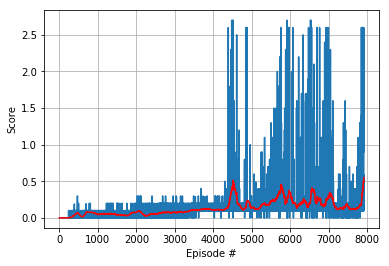

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores,label='scores')
plt.plot(np.arange(1, len(nmean_scores)+1), nmean_scores,'r-',
         label='mean scores')
plt.grid()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# NOTE: next section needs to be updated for the saved items above instead of P2 saved items....

In [15]:
tend_run = datetime.datetime.now()
dtime_run = tend_run - tstart_run
print('DDPG total run time took ',dtime_run)

DDPG total run time took  2:31:21.147958


# NOTE: we don't uncomment the line below until things are working....

In [17]:
#env.close()

# The final agent solution 
Techically speaking we made our requirement at 4520 with learning score of 0.5019, however in these cases I typically don't break out until I've exceeded the requirement by some small amount (in this case 10% = 0.55); this however resulted in taking 7910 episodes to reach a score of 0.5430

num_instance -- number of instances of agents employed (=1 for this project)
random_seed -- random seed
lr_actor -- learning rate of the actor (2.0e-4 final value)
lr_critic -- learning rate of the critic (2.0e-4, final value)
tau -- soft_update size of updating the target network with the local network values (1.0e-2 final value)
gamma -- discount factor for the learn method for the critic network (0.8 final value)
The ddpg_agent also contains the following hardcoded parameters:
Buffer size: 100,000
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.8             # discount factor
TAU = 1e-2              # for soft update of target parameters
LR_ACTOR = 2e-4         # learning rate of the actor 
LR_CRITIC = 2e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay used in critic optimizer
LEARN_START = 0         # minimum memory in replay buffer before executing learn method
UPDATE_EVERY=10         # used to modulo the increasing t_step internal counter to determine if learning from replaybuffer experiences (or not)
UPDATES_PER_STEP=10     # define number of times the model learns from the randomly selected experiences in replaybuffer
NOISE_MU = 0.0          # the mean of the action noise for OUNoise class
NOISE_THETA = 0.15      # the memory term for the Ornstein-Uhlenbeck process
NOISE_SIGMA = 0.1       # the standard deviation of action noise for OUNoise class, 0.1 was better than 0.2

DEFAULT_FC1_ACTOR = 40 # THIS IS THE ONE SUBMITTED
DEFAULT_FC2_ACTOR = 20 # THIS IS THE ONE SUBMITTED
DEFAULT_FC1_CRITIC = DEFAULT_FC1_ACTOR
DEFAULT_FC2_CRITIC = DEFAULT_FC2_ACTOR

However you can see the output of many of the more fixed hyperparameters (not passed via argument list) in the Tennis.ipynb file.

# Future proposed additions
Like our previous project, we would have liked to potentially explore some of the post-DDPG example approaches, such as MADDPG (Multi-Agent DDPG) and the N-step. However since these were mainly modifications of the internal workings of the agents and the like, we felt that it was best to first get the baseline DDPG running and then see if there are problems about possibly making these modifications. 

So we start with our original agent and model, which we've imported locally and import the (slightly modified) DDPG function for the unity setup, and this was found to be sufficient for this exercise.

As mentioned above we believe probably the greatest improvement will come from an N-step implementation, since this could provide information on longer-term solutions earlier and provide more information to the networks about longer term rewards.

Another would be to do at least a much greater sensitivity exploration of the hyperparameters after our BATCHSIZE increase to 128, not only of the hyperparameters that were passed via argument list:

LR_ACTOR = 2e-4         # learning rate of the actor 
LR_CRITIC = 2e-4        # learning rate of the critic
TAU = 1e-2              # for soft update of target parameters
GAMMA = 0.8            # discount factor

But also a number of the more "hardcoded" values:

DDPG Agent.init, UPDATE_EVERY: 10
DDPG Agent.init, UPDATES_PER_STEP: 10
DDPG Agent.init, LEARN_START: 0
DDPG Agent.init, NOISE_MU: 0.0
DDPG Agent.init, NOISE_THETA: 0.15
DDPG Agent.init, NOISE_SIGMA: 0.1

as well as a number of the various other techniques we tried before that didn't work initially:
1) adding noise to the weights in the network INSTEAD of the action
2) OR adding noise to the states INSTEAD of the action. 
3) batch normalization
4) dropouts.

neither of which we had time at the end to fully expore.


# REFERENCES

## Basic
Github example of continous control with DDPG
https://github.com/MariannaJan/continous_control_DDPG

Article: "Continuous Deep Q-Learning with Model-based Acceleration", by Gu et al., 2016
https://arxiv.org/pdf/1603.00748.pdf

Article: "CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING" by Lillencrap et al, 2019
https://arxiv.org/pdf/1509.02971.pdf

Article: "Benchmarking Deep Reinforcement Learning for Continuous Control" by Duan et al, 2016
https://arxiv.org/pdf/1604.06778.pdf


"Let’s make a DQN: Double Learning and Prioritized Experience Replay", 2016
https://jaromiru.com/2016/11/07/lets-make-a-dqn-double-learning-and-prioritized-experience-replay/


Github RL Lab by by ShangtonZhang
https://github.com/rll/rllab

"DDPG (Actor-Critic) Reinforcement Learning using PyTorch and Unity ML-Agents", solution to 
"how to handle mutliple agents in ddpg pytorch" google search
https://github.com/xkiwilabs/DDPG-using-PyTorch-and-ML-Agents

Examples:
https://github.com/Nathan1123/P3_Collaboration_and_Competition
https://github.com/ainvyu/p3-collab-compet
 

## D4PG
Article: "DISTRIBUTED DISTRIBUTIONAL DETERMINISTIC POLICY GRADIENTS",by Barth-Maron, 2018
https://openreview.net/pdf?id=SyZipzbCb

## General knowledge of various topics in no particular order (as opened I think)
https://discuss.pytorch.org/t/is-there-any-way-to-add-noise-to-trained-weights/29829

https://www.google.com/search?q=how+to+add+noise+to+hidden+weights+in+neural+network&sxsrf=APq-WBsz6Lkp4NEm56rbGqCPlcJUrUu3Bg%3A1649895248160&ei=UGdXYtW0CdDTkPIPvrylqAE&oq=how+to+add+noise+to+hidden+weights+&gs_lcp=Cgdnd3Mtd2l6EAEYAjIFCCEQoAEyBQghEKABMgUIIRCgAUoECEEYAEoECEYYAFAAWOVcYNJ9aABwAHgAgAGZAYgB4R6SAQUxMi4yNJgBAKABAcABAQ&sclient=gws-wiz#kpvalbx=_XGhXYraXAdmfkPIP79uQ0AQ3

https://stackoverflow.com/questions/59013993/how-can-i-add-bias-using-pytorch-to-a-neural-network

https://www.codetd.com/en/article/11834682

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

https://discuss.pytorch.org/t/add-gaussian-noise-to-parameters-while-training/109260

https://discuss.pytorch.org/t/is-there-any-way-to-add-noise-to-trained-weights/29829/3

https://discuss.pytorch.org/t/how-to-install-pytorch-0-4-0-with-cuda-9-0/48914

https://coder.social/udacity/deep-reinforcement-learning

https://www.bing.com/search?q=pytorch+0.4.0+cuda&form=ANNTH1&refig=c3d77ee899304f5fabb8f3cedcf82bfe&ntref=1

https://discuss.pytorch.org/t/how-to-install-pytorch-0-4-0-with-cuda-9-0/48914

https://www.bing.com/search?q=KeyError%3A%20%22Couldn%27t%20find%20field%20FieldDescriptorProto.proto3_optional%22%20python%20unity&qs=n&form=QBRE&=%25eManage%20Your%20Search%20History%25E&sp=-1&pq=keyerror%3A%20%22couldn%27t%20find%20field%20google.protobuf.fielddescriptorproto.proto3_optional%22%20python%20unity&sc=0-97&sk=&cvid=E9ABE10449F64343A0C7058F615BDFE4&ntref=1

https://stackoverflow.com/questions/71626781/anaconda-python-expainerdashboard-keyerror-couldnt-find-field-google-pr

https://stackoverflow.com/questions/47257751/keyerror-couldnt-find-field-google-protobuf-descriptorproto-extensionrange-op

https://www.bing.com/search?q=how%20to%20install%20kernel%20in%20jupyter%20for%20specific%20anaconda%20environment&qs=n&form=QBRE&=%25eManage%20Your%20Search%20History%25E&sp=-1&pq=how%20to%20install%20kernel%20in%20jupyter%20for%20specific%20anaconda%20env&sc=0-58&sk=&cvid=8D1EBF16895D4FAC88936EF9826A2315&ntref=1

https://gdcoder.com/how-to-create-and-add-a-conda-environment-as-jupyter-kernel/

https://www.bing.com/search?q=how+to+get+a+directory+listing+in+python&form=ANNTH1&refig=7cad7cc5de9d4a9194816ef7db907e47&sp=3&qs=UT&pq=how+to+get+a+directory+listing+&sk=PRES1UT2&sc=8-31&cvid=7cad7cc5de9d4a9194816ef7db907e47

https://www.bing.com/search?q=gaierror+python+3&form=ANNTH1&refig=7fa870dbe59b43ac9c3f41d4079b6192&sp=1&qs=MT&pq=gaierror+&sk=PRES1&sc=8-9&cvid=7fa870dbe59b43ac9c3f41d4079b6192&ntref=1

https://www.tecmint.com/resolve-temporary-failure-in-name-resolution/

https://stackoverflow.com/questions/40238610/what-is-the-meaning-of-gaierror-errno-3-temporary-failure-in-name-resolutio

https://www.bing.com/search?q=python%20NewConnectionError%3A%20%3Curllib3.connection.HTTPConnection%20object%20at%200x0000022F86B32160%3E%3A%20Failed%20to%20establish%20a%20new%20connection%3A%20%5BErrno%2011001%5D%20getaddrinfo%20failed&qs=n&form=QBRE&=%25eManage%20Your%20Search%20History%25E&sp=-1&pq=newconnectionerror%3A%20%3Curllib3.connection.httpconnection%20object%20at%200x0000022f86b32160%3E%3A%20failed%20to%20establish%20a%20new%20connection%3A%20%5Berrno%2011001%5D%20getaddrinfo%20failed&sc=0-156&sk=&cvid=ACDA2B21B37E4AF3B44B2A8AA3F0365F&ntref=1

https://itecnote.com/tecnote/python-httpconnectionpool-failed-to-establish-a-new-connection-errno-11004-getaddrinfo-failed/

https://github.com/openai?msclkid=7f9ebcb6b20011ecb533e3c5de0cedd9

https://github.com/llSourcell/OpenAI_Five_vs_Dota2_Explained?msclkid=7f9d4f9db20011eca2d8c4fc80eeec2f

https://github.com/tristandeleu/pytorch-maml-rl

https://github.com/openai/maddpg

https://github.com/rlworkgroup/garage

https://github.com/shariqiqbal2810/MAAC

https://github.com/openai/gym/wiki/BipedalWalker-v2

https://pytorch.org/docs/stable/generated/torch.cat.html

https://stackoverflow.com/questions/47331235/how-should-openai-environments-gyms-use-env-seed0

http://download.pytorch.org/whl/cpu/torch/

https://stackoverflow.com/questions/19283271/how-to-uninstall-requests-2-0-0

https://stackoverflow.com/questions/38411942/anaconda-conda-install-a-specific-package-version

https://pypi.org/project/mxnet/

https://discuss.pytorch.org/t/tensorboard-with-pytorch-summarywritter/84668

https://pytorch.org/docs/stable/generated/torch.norm.html

https://www.programcreek.com/python/example/107653/torch.nn.BatchNorm1d

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

https://numpy.org/doc/stable/reference/generated/numpy.ndarray.view.html

https://pytorch.org/docs/stable/generated/torch.Tensor.view.html

https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Training-ML-Agents.md#training-using-concurrent-unity-instances

https://realpython.com/python-or-operator/

https://pytorch.org/get-started/previous-versions/

https://developer.nvidia.com/cuda-90-download-archive?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exelocal

https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html#download-cuda-software

https://developer.nvidia.com/cuda-toolkit

https://developer.nvidia.com/search?page=3&sort=relevance&term=using%20cuda%209.0%20python%20on%20windows%2011

https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html

https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html

https://www.google.com/search?q=conda+create+environment+from+yml&sxsrf=APq-WBtkxuAaqkH2fFvJeTBBEKl-6HLc1w%3A1649792235975&ei=69RVYumWO62dkPIP3_6RoA4&oq=conda+env+create+-f&gs_lcp=Cgdnd3Mtd2l6EAEYATIHCAAQRxCwAzIHCAAQRxCwAzIHCAAQRxCwAzIHCAAQRxCwAzIHCAAQRxCwAzIHCAAQRxCwAzIHCAAQRxCwAzIHCAAQRxCwA0oECEEYAEoECEYYAFAAWABgnhpoAXABeACAAQCIAQCSAQCYAQDIAQjAAQE&sclient=gws-wiz

https://docs.conda.io/projects/conda-build/en/latest/user-guide/wheel-files.html

https://docs.python.org/3/library/copy.html#module-copy

https://www.geeksforgeeks.org/check-multiple-conditions-in-if-statement-python/

https://stackoverflow.com/questions/52288635/how-do-i-use-torch-stack

https://medium.com/adding-noise-to-network-weights-in-tensorflow/adding-noise-to-network-weights-in-tensorflow-fddc82e851cb

https://discuss.pytorch.org/t/how-to-change-the-weights-of-a-pytorch-model/41279

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/

https://www.codetd.com/en/article/11834682

https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/

https://discuss.pytorch.org/t/is-there-any-way-to-add-noise-to-trained-weights/29829/9

https://arxiv.org/pdf/1805.08000.pdf

https://stackoverflow.com/questions/59013993/how-can-i-add-bias-using-pytorch-to-a-neural-network

https://discuss.pytorch.org/t/add-gaussian-noise-to-parameters-while-training/109260

https://github.com/christianversloot/machine-learning-articles/blob/main/using-dropout-with-pytorch.md

https://stackoverflow.com/questions/9413367/most-efficent-way-of-finding-the-minimum-float-in-a-python-list
